

*   Andika Ilham Sinau
*   H071201092



In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
%matplotlib inline

In [ ]:
confirmed_df = pd.read_csv("/content/drive/MyDrive/Machine learning/time_series_covid_19_confirmed.csv")
deaths_df = pd.read_csv("/content/drive/MyDrive/Machine learning/time_series_covid_19_deaths.csv")
recovered_df = pd.read_csv("/content/drive/MyDrive/Machine learning/time_series_covid_19_recovered.csv")

In [ ]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
0,Anhui,Mainland China,31.82571,117.2264,1,9,15,39,60,70,...,860,889,910,934,950,962,973,982,986,987
1,Beijing,Mainland China,40.18238,116.4142,14,22,36,41,68,80,...,342,352,366,372,375,380,381,387,393,395
2,Chongqing,Mainland China,30.05718,107.8740,6,9,27,57,75,110,...,505,518,529,537,544,551,553,555,560,567
3,Fujian,Mainland China,26.07783,117.9895,1,5,10,18,35,59,...,267,272,279,281,285,287,290,292,293,293
4,Gansu,Mainland China,36.06110,103.8343,0,2,2,4,7,14,...,86,87,90,90,90,90,91,91,91,91


In [ ]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
0,Anhui,Mainland China,31.82571,117.2264,0,0,0,0,0,0,...,4,4,5,6,6,6,6,6,6,6
1,Beijing,Mainland China,40.18238,116.4142,0,0,0,0,0,1,...,3,3,3,3,4,4,4,4,4,4
2,Chongqing,Mainland China,30.05718,107.8740,0,0,0,0,0,0,...,3,3,4,5,5,5,5,5,5,6
3,Fujian,Mainland China,26.07783,117.9895,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Gansu,Mainland China,36.06110,103.8343,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [ ]:
cols = confirmed_df.keys()

Storing the values of dates only

In [ ]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recovered_df.loc[:, cols[4]:cols[-1]]

Total number of cases, death recoveries

In [ ]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
total_recovered = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

Reshaping data

In [ ]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

EDA

In [ ]:
confirmed.isna().sum()

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
1/27/20    0
1/28/20    0
1/29/20    0
1/30/20    0
1/31/20    0
2/1/20     0
2/2/20     0
2/3/20     0
2/4/20     0
2/5/20     0
2/6/20     0
2/7/20     0
2/8/20     0
2/9/20     0
2/10/20    0
2/11/20    0
2/12/20    0
2/13/20    0
2/14/20    0
2/15/20    0
2/16/20    0
2/17/20    0
2/18/20    0
2/19/20    0
2/20/20    0
dtype: int64

In [ ]:
days_in_future = 3
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)

In [ ]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
adjusted_dates = future_forcast_dates[:-3]

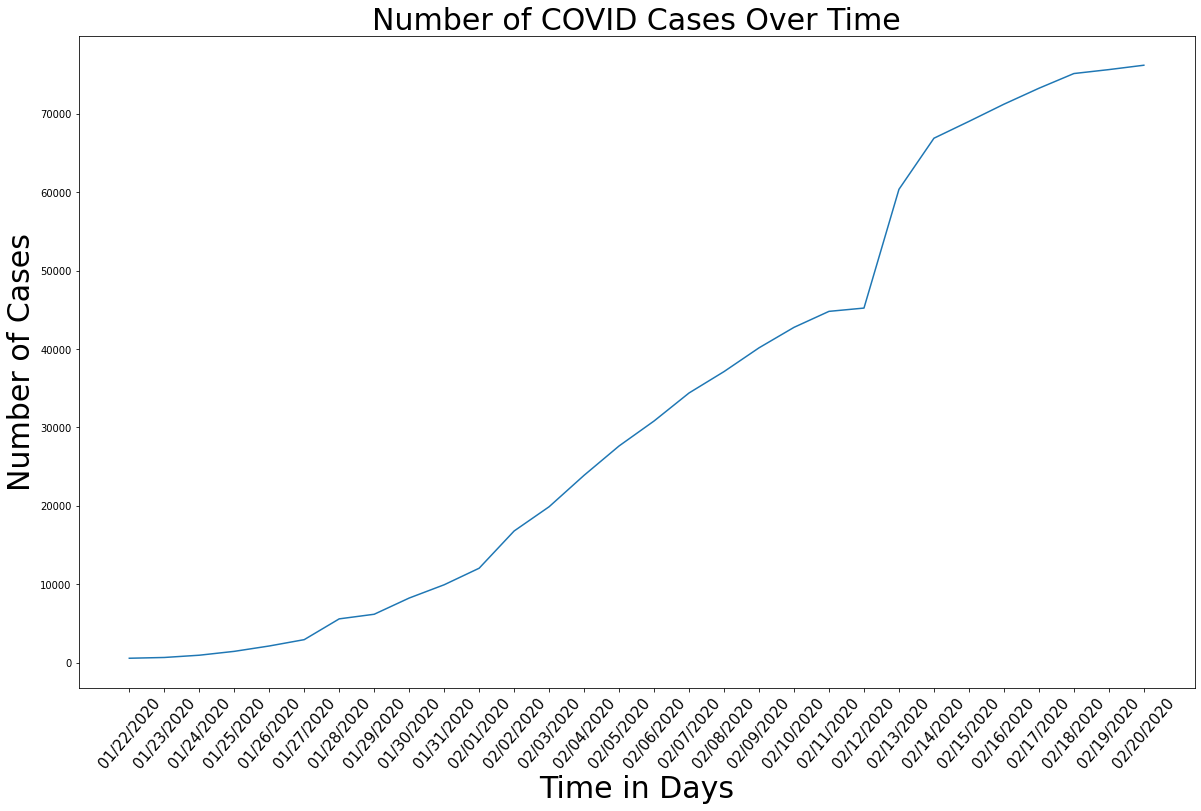

In [ ]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.title('Number of COVID Cases Over Time', size=30)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(rotation=50, size=15)
plt.show()

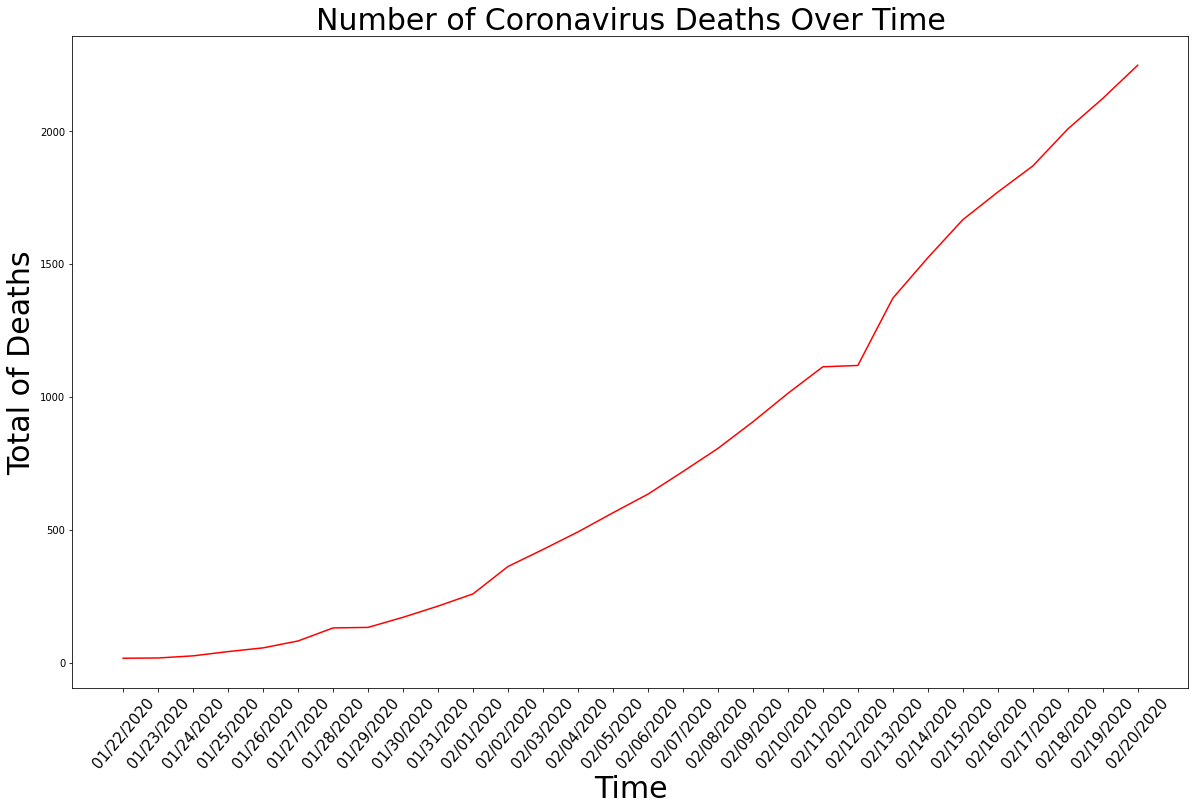

In [ ]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths, color='red')
plt.title('Number of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Total of Deaths', size=30)
plt.xticks(rotation=50, size=15)
plt.show()

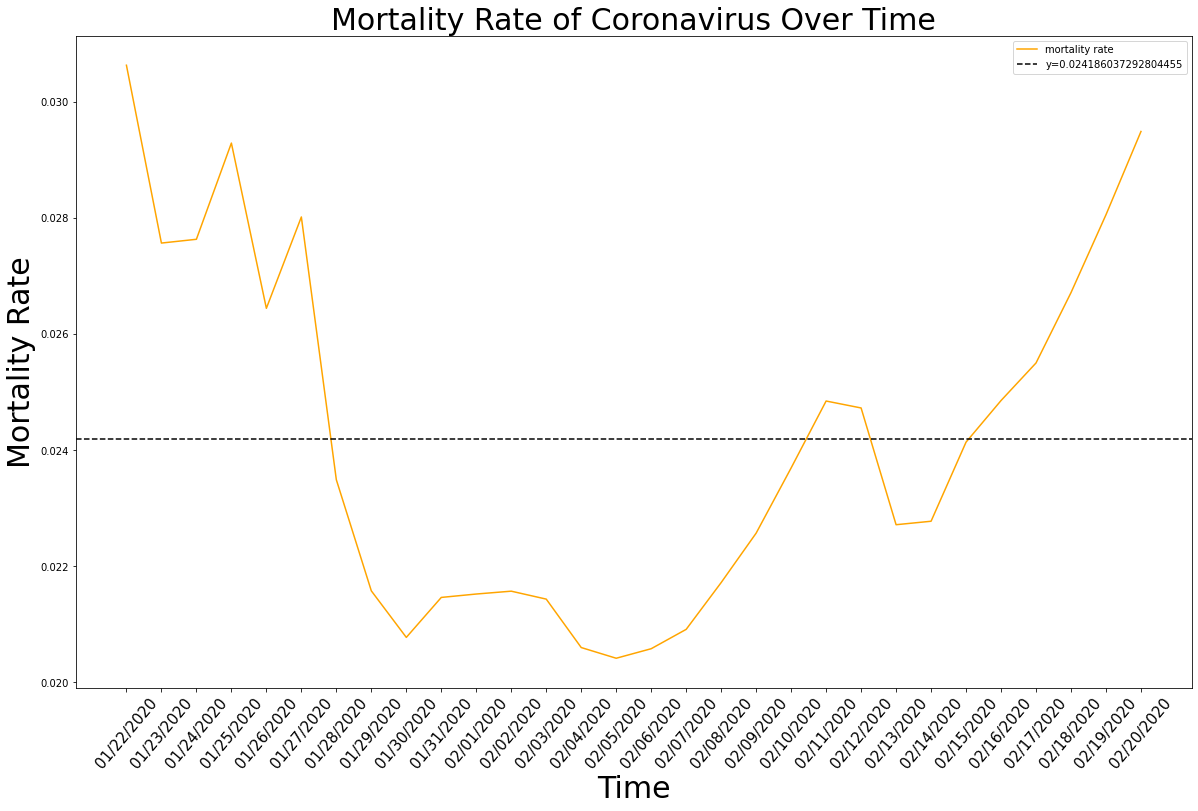

In [ ]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)])
plt.xlabel('Time', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(rotation=50, size=15)
plt.show()

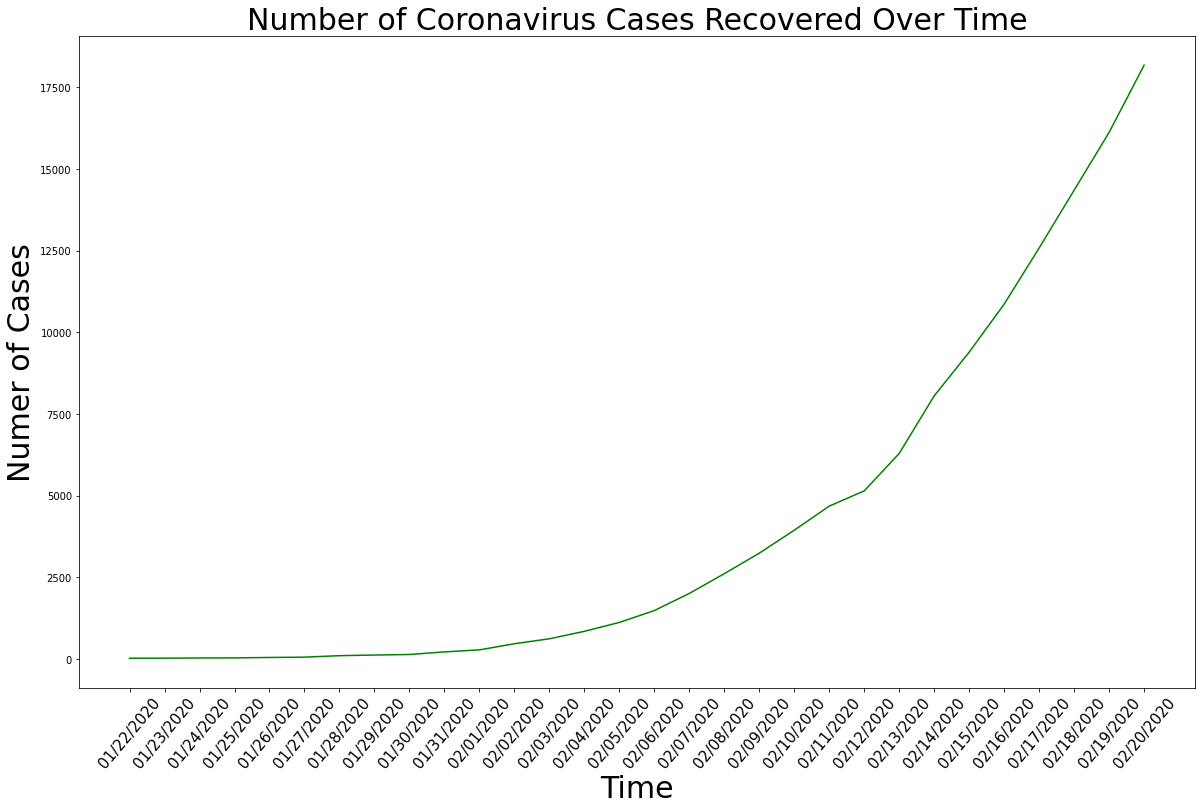

In [ ]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_recovered, color='green')
plt.title('Number of Coronavirus Cases Recovered Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Numer of Cases', size=30)
plt.xticks(rotation=50, size=15)
plt.show()

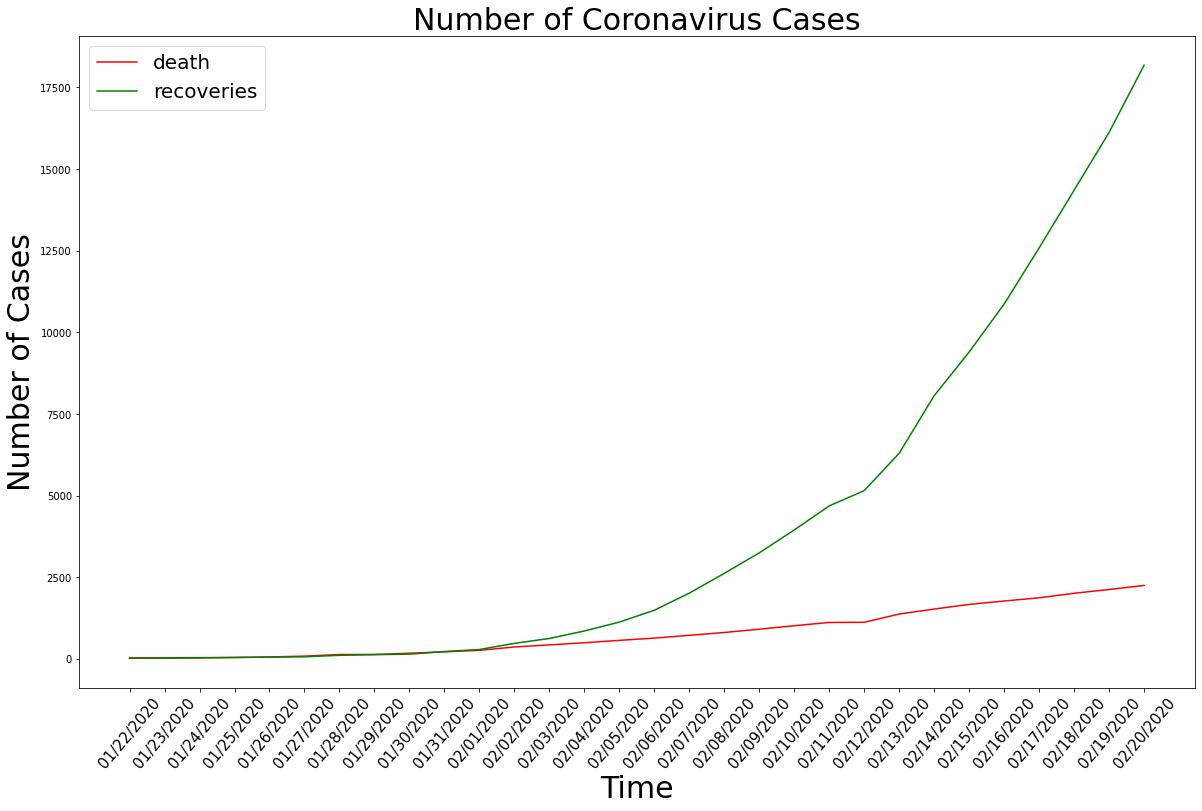

In [ ]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths, color='red')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('Number of Coronavirus Cases', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(rotation=50, size=15)
plt.show()

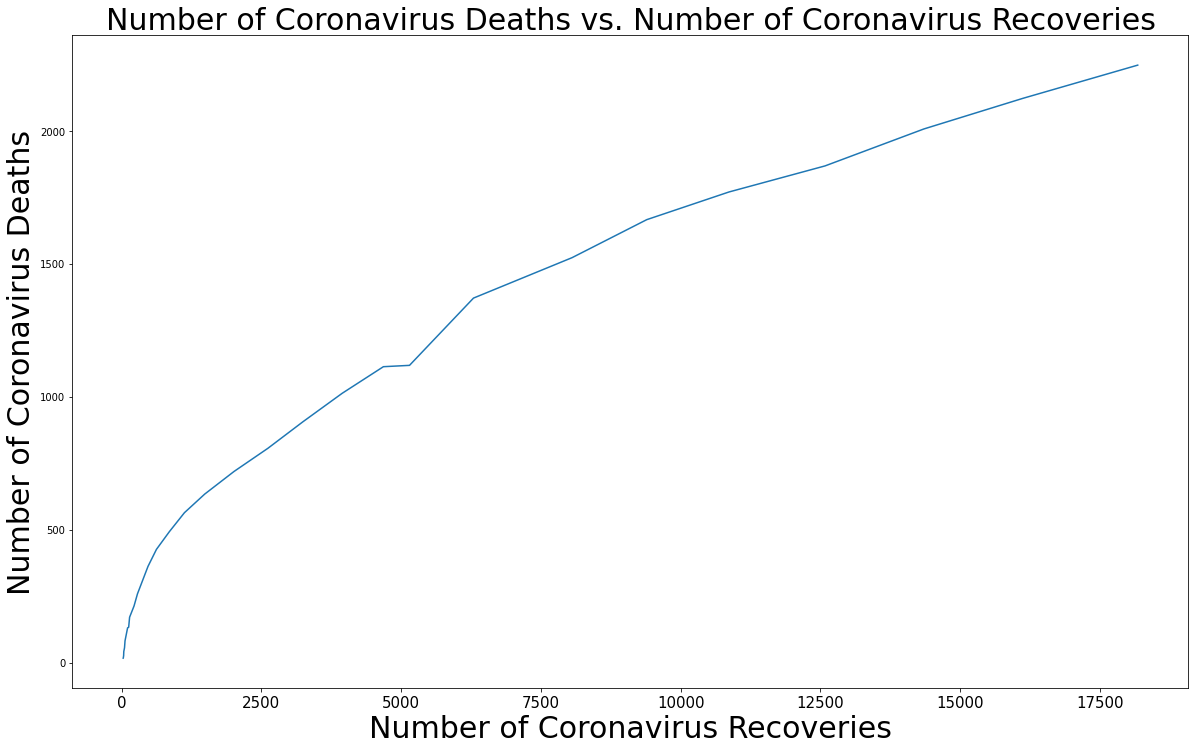

In [ ]:
plt.figure(figsize=(20, 12))
plt.plot(total_recovered, total_deaths)
plt.title('Number of Coronavirus Deaths vs. Number of Coronavirus Recoveries', size=30)
plt.xlabel('Number of Coronavirus Recoveries', size=30)
plt.ylabel('Number of Coronavirus Deaths', size=30)
plt.xticks(size=15)
plt.show()

In [ ]:
latest_confirmed = confirmed_df[dates[-1]]
latest_deaths = deaths_df[dates[-1]]
latest_recoveries = recovered_df[dates[-1]]

In [ ]:
unique_countries =  list(confirmed_df['Country/Region'].unique())

In [ ]:
country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_df['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)

In [ ]:
# number of cases per country/region
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Mainland China: 74999 cases
Thailand: 35 cases
Japan: 94 cases
South Korea: 104 cases
Taiwan: 24 cases
US: 15 cases
Macau: 10 cases
Hong Kong: 68 cases
Singapore: 84 cases
Vietnam: 16 cases
France: 12 cases
Nepal: 1 cases
Malaysia: 22 cases
Canada: 8 cases
Australia: 15 cases
Cambodia: 1 cases
Sri Lanka: 1 cases
Germany: 16 cases
Finland: 1 cases
United Arab Emirates: 9 cases
Philippines: 3 cases
India: 3 cases
Italy: 3 cases
UK: 9 cases
Russia: 2 cases
Sweden: 1 cases
Spain: 2 cases
Belgium: 1 cases
Others: 634 cases
Egypt: 1 cases
Iran: 5 cases


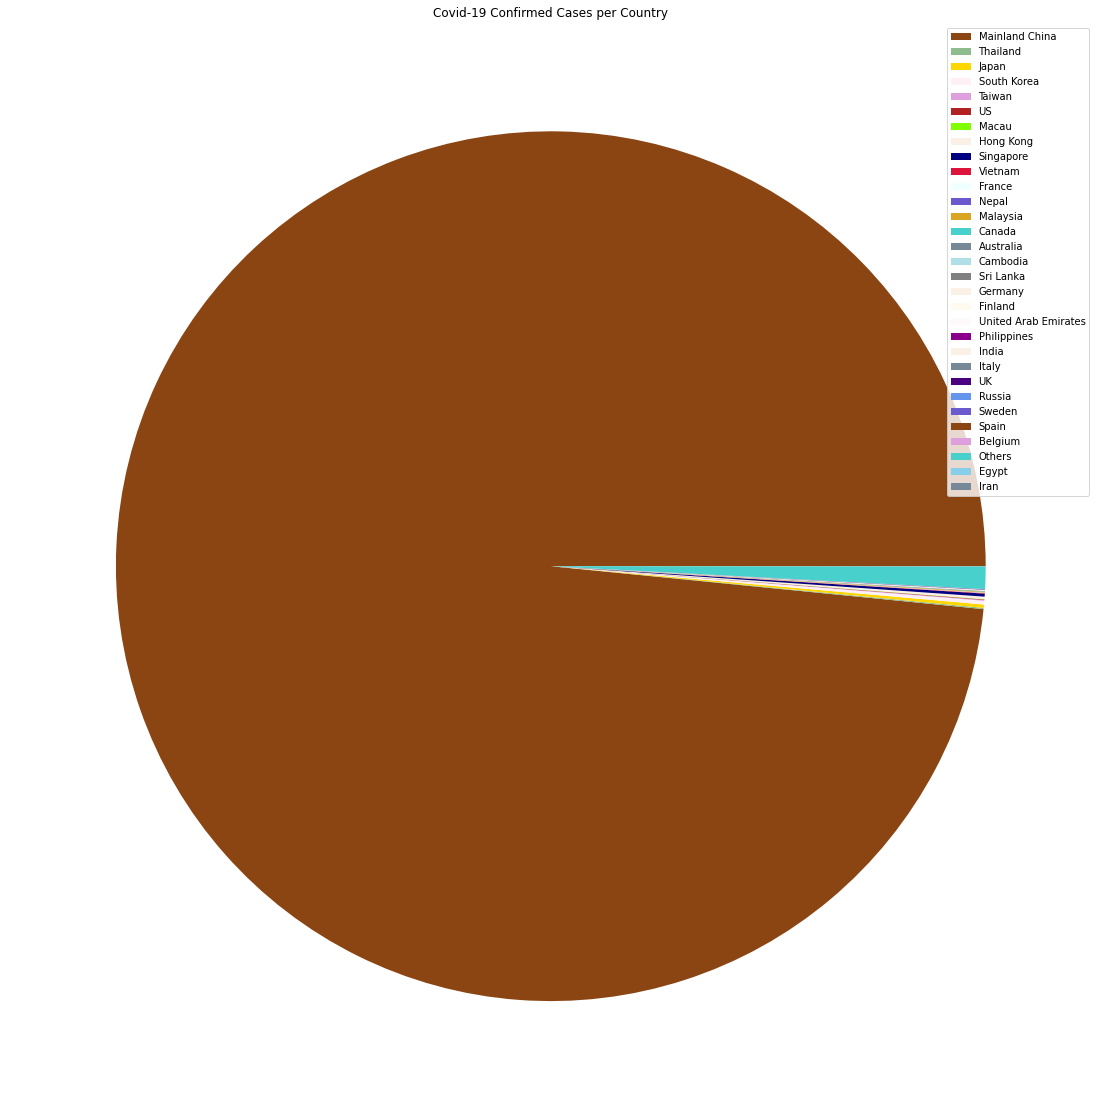

In [ ]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-19 Confirmed Cases per Country')
plt.pie(country_confirmed_cases, colors=c)
plt.legend(unique_countries, loc='best')
plt.show()

Predictions

Training and Testing

In [ ]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.1, shuffle=False) 

In [ ]:
X_train_confirmed.shape, y_train_confirmed.shape, X_test_confirmed.shape, y_test_confirmed.shape

((27, 1), (27, 1), (3, 1), (3, 1))

Random Forest Regession Model


In [ ]:
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 7, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],}
# Instantiate RandomizedSearchCV model
rfr_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1sst
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=30,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rfr_model.fit(X_train_confirmed, y_train_confirmed)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=30,
                   param_distributions={'max_depth': [None, 3, 7, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [ ]:
test_rfr_pred = rfr_model.predict(X_test_confirmed)
rfr_pred = rfr_model.predict(future_forcast)
print('MAE:', mean_absolute_error(test_rfr_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_rfr_pred, y_test_confirmed))

MAE: 6291.058795093796
MSE: 39765208.985549234


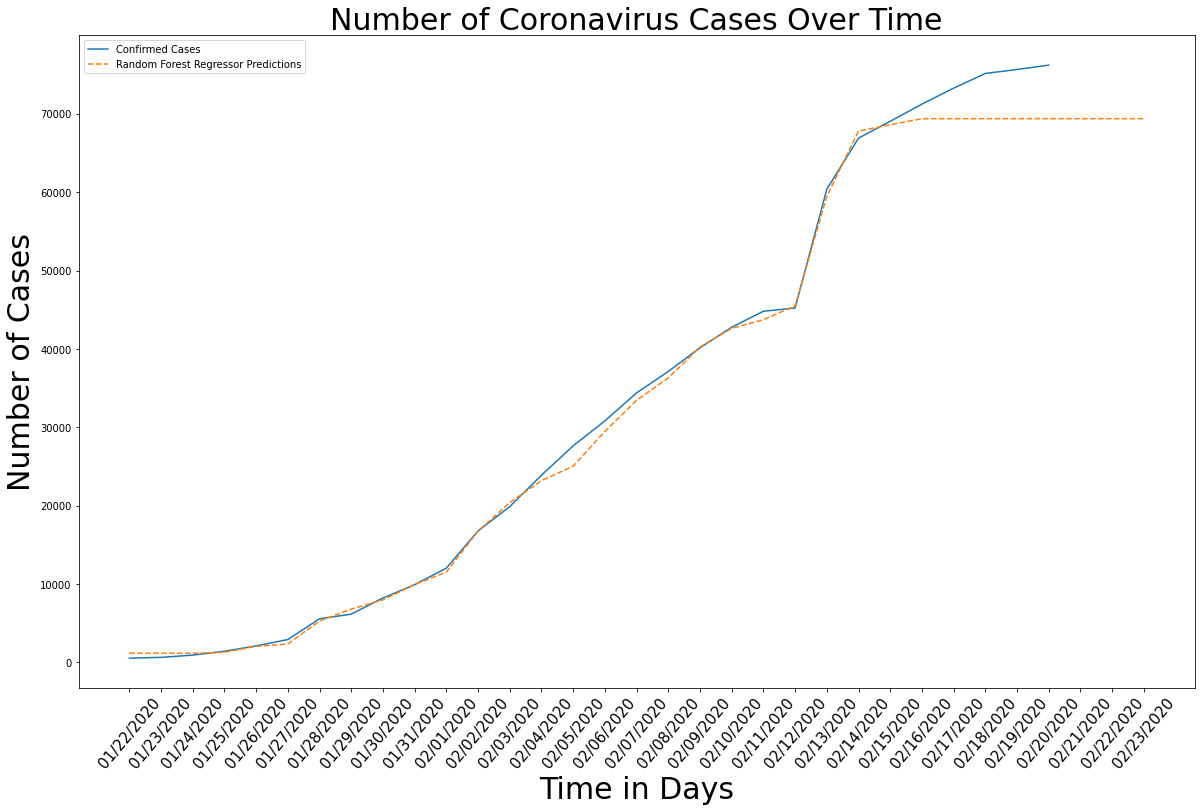

In [ ]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast_dates, rfr_pred, linestyle='dashed')
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'Random Forest Regressor Predictions'])
plt.xticks(rotation=50, size=15)
plt.show()

In [ ]:
print('Random Forest Regessor prediction: ', set(zip(future_forcast_dates[-4:], rfr_pred[-4:])))

Random Forest Regessor prediction:  {('02/22/2020', 69368.27453823954), ('02/20/2020', 69368.27453823954), ('02/21/2020', 69368.27453823954), ('02/23/2020', 69368.27453823954)}
